# [이것이 데이터 분석이다] 
- 날짜 : 6월 30일(목) 스터디

## 3.3 미래에 볼 영화의 평점 예측하기

In [4]:
%matplotlib inline
import time
import operator 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rating_data = pd.io.parsers.read_csv("ratings.dat", names = ['user_id', 'movie_id', 'rating', 'time'], delimiter = '::', encoding='latin1', engine = 'python')
movie_data = pd.io.parsers.read_csv("movies.dat", names = ['movie_id', 'title', 'genre'], delimiter = '::', encoding='latin1', engine = 'python')
user_data = pd.io.parsers.read_csv("users.dat", names = ['user_id', 'gender', 'age', 'occupation', 'zipcode'], delimiter = '::', encoding='latin1', engine = 'python')


In [5]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
user_data.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
# 총 영화의 개수 출력하기
print("total number of movie in data : ", len(movie_data['movie_id'].unique()))
# 연도별 영화 개수가 많은 Top 10 연도 출력
movie_data['year'] = movie_data['title'].apply(lambda x : x[-5:-1])
movie_data['year'].value_counts().head(10)

total number of movie in data :  3883


1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: year_term, dtype: int64
<class 'pandas.core.series.Series'>


/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


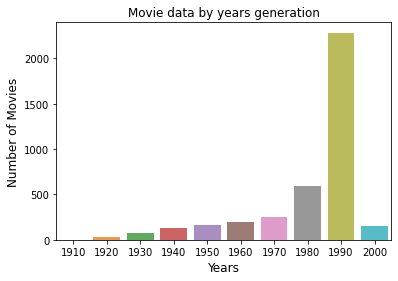

In [9]:
# 미니퀴즈 3-3 : 위의 내용을 응용하여 영화의 연대별 개수를 탐색해보세요.
movie_data['year_term'] = movie_data['title'].apply(lambda x : x[-5:-2] + "0")
movie_year_term = movie_data['year_term'].value_counts().sort_index()
# 시각화
print(movie_year_term)
print(type(movie_year_term))
sns.barplot(movie_year_term.index, movie_year_term.values, alpha = 0.8)
plt.title("Movie data by years generation")
plt.ylabel("Number of Movies", fontsize = 12)
plt.xlabel("Years", fontsize = 12)
plt.show()

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


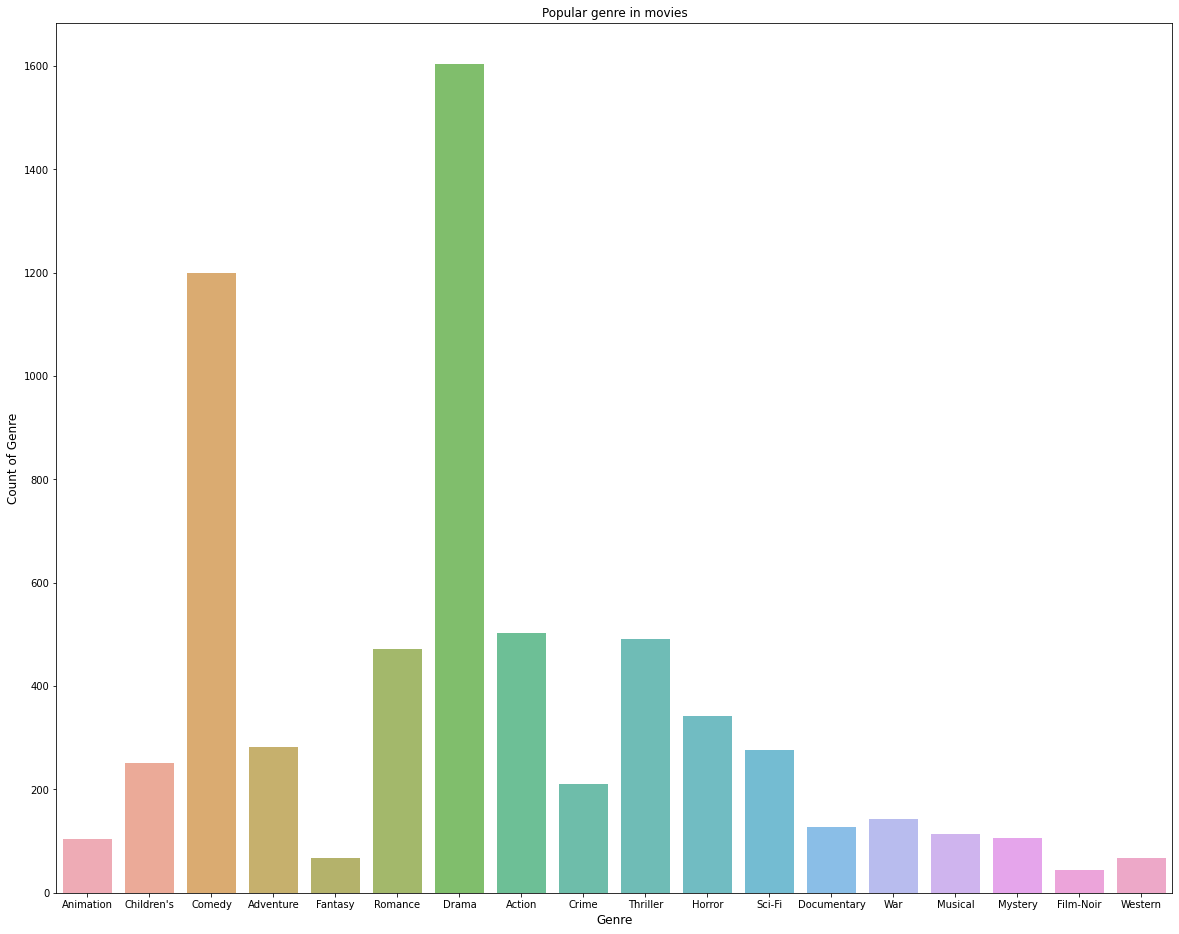

In [10]:
# 가장 많이 등장한 장르의 속성을 출력하기 
unique_genre_dict = {}
for index, row in movie_data.iterrows():
    genre_combination = row['genre']
    parsed_genre = genre_combination.split("|")
    for genre in parsed_genre:
        if genre in unique_genre_dict:
            unique_genre_dict[genre] += 1
        else:
            unique_genre_dict[genre] = 1
# unique_genre_dict을 이용하여 장르의 속성을 그래프로 출력
plt.rcParams['figure.figsize'] = [20, 16]
sns.barplot(list(unique_genre_dict.keys()), list(unique_genre_dict.values()), alpha = 0.8)
plt.title("Popular genre in movies")
plt.ylabel("Count of Genre", fontsize = 12)
plt.xlabel("Genre", fontsize = 12)
plt.show()

-----------
## 발표

----

In [11]:
# 분석할 유저의 정보 탐색하기 
print("Total number of user in data : ", len(user_data['user_id'].unique()))

Total number of user in data :  6040


In [12]:
user_data.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [13]:
# 미니퀴즈 3-4-1 : 유저의 성별 탐색 
user_gender = user_data['gender'].value_counts()
print(user_gender)

M    4331
F    1709
Name: gender, dtype: int64


In [14]:
# 미니퀴즈 3-4-2 : 유저의 연령대 탐색 
user_data['ages'] = user_data['age'].apply(lambda x : str(x)[0] + "0")
user_ages = user_data['ages'].value_counts()
print(user_ages)

20    2096
10    1325
30    1193
50     876
40     550
Name: ages, dtype: int64


[2077  701  478 ...   54   40  388]


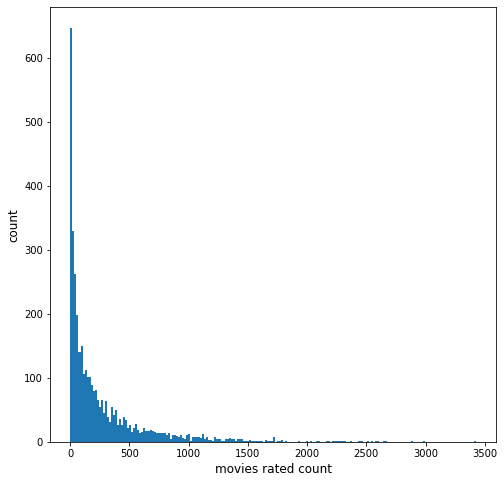

Total number of movie in data :  3883
Total number of movie rated below 100 :  1687


In [15]:
# 각 영화가 평가 받은 횟수 탐색
movie_rate_count = rating_data.groupby('movie_id')['rating'].count().values
print(movie_rate_count)
plt.rcParams['figure.figsize'] = [8, 8]
fig = plt.hist(movie_rate_count, bins = 200)
plt.ylabel('count', fontsize = 12)
plt.xlabel('movies rated count', fontsize = 12)
plt.show()
print("Total number of movie in data : ", len(movie_data['movie_id'].unique()))
print("Total number of movie rated below 100 : ", len(movie_rate_count[movie_rate_count < 100]))

          count      mean
movie_id                 
1          2077  4.146846
2           701  3.201141
3           478  3.016736
4           170  2.729412
5           296  3.006757
...         ...       ...
3948        862  3.635731
3949        304  4.115132
3950         54  3.666667
3951         40  3.900000
3952        388  3.780928

[3706 rows x 2 columns]


<AxesSubplot:>

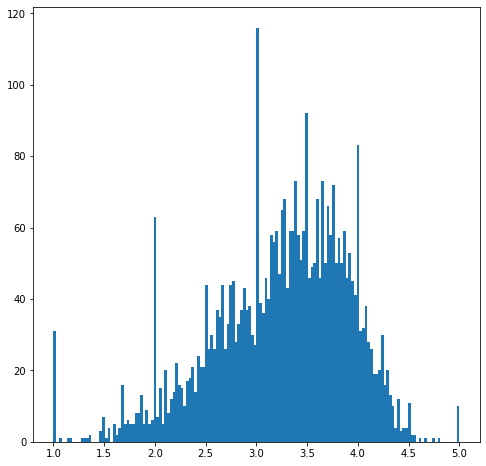

In [16]:
# 영화별 평균 평점을 탐색하기
movie_grouped_rating_info = rating_data.groupby("movie_id")['rating'].agg(['count', 'mean'])
print(movie_grouped_rating_info)
movie_grouped_rating_info.columns = ['rated_count', 'rating_mean']
movie_grouped_rating_info['rating_mean'].hist(bins = 150, grid = False)

         count      mean       std
user_id                           
1           53  4.188679  0.680967
2          129  3.713178  1.001513
3           51  3.901961  0.984985
4           21  4.190476  1.077917
5          198  3.146465  1.132699
...        ...       ...       ...
6036       888  3.302928  1.023684
6037       202  3.717822  0.877910
6038        20  3.800000  1.105013
6039       123  3.878049  0.730881
6040       341  3.577713  1.179719

[6040 rows x 3 columns]
         rated_count  rating_mean  rating_std
user_id                                      
1                 53     4.188679    0.680967
2                129     3.713178    1.001513
3                 51     3.901961    0.984985
4                 21     4.190476    1.077917
5                198     3.146465    1.132699
...              ...          ...         ...
6036             888     3.302928    1.023684
6037             202     3.717822    0.877910
6038              20     3.800000    1.105013
6039          

<AxesSubplot:>

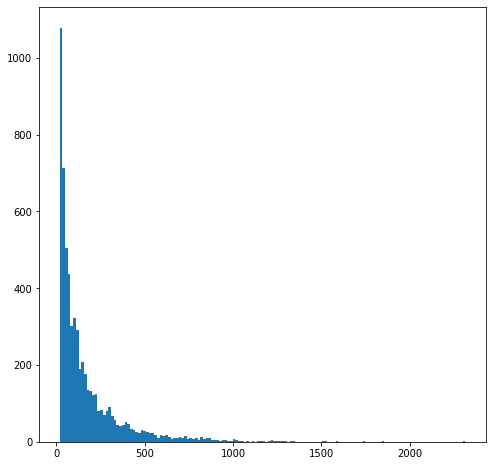

In [17]:
# 미니퀴즈 3-5-1 : 유저 그룹 단위의 평점 속성을 분석 - 유저별로 평가한 영화 개수 
user_grouped_rating_info = rating_data.groupby('user_id')['rating'].agg(['count', 'mean', 'std'])
print(user_grouped_rating_info)
user_grouped_rating_info.columns = ['rated_count', 'rating_mean', 'rating_std']
print(user_grouped_rating_info)
user_grouped_rating_info['rated_count'].hist(bins = 150, grid = False)

<AxesSubplot:>

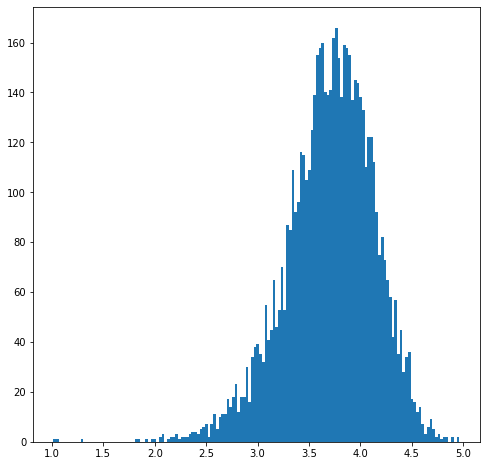

In [18]:
user_grouped_rating_info['rating_mean'].hist(bins = 150, grid = False)

<AxesSubplot:>

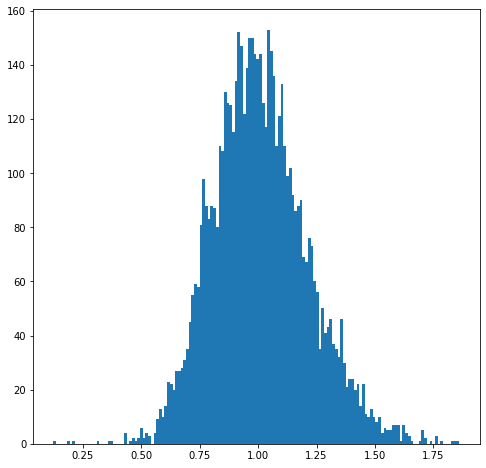

In [19]:
user_grouped_rating_info['rating_std'].hist(bins = 150, grid = False)

In [21]:
rating_data

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [20]:
rating_table = rating_data[['user_id', 'movie_id', 'rating']].set_index(['user_id', 'movie_id']).unstack()
rating_table

rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 3943 3944   
user_id                                                       ...             
1           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
3           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
5           NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
6036        NaN  NaN  NaN  2.0  NaN  3.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6037        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6038        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6039        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6040        3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

                                                  
movie_id 3945 3946 3947 3948 3949 3950 3951 3952  
user_id                                           
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...       ...  ...  ...  ...  ...  ...  ...  ...  
6036      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6037      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6038      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6039      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6040      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[6040 rows x 3706 columns]

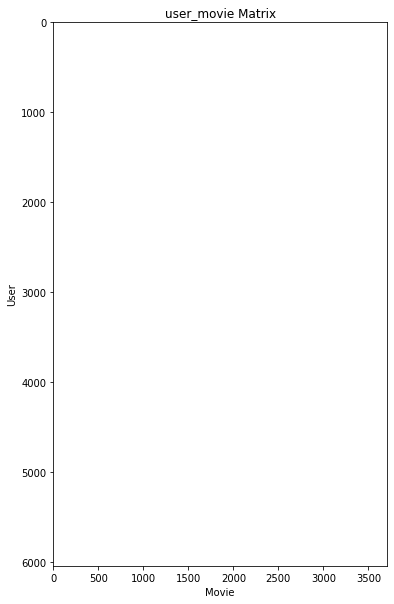

In [23]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(rating_table)
plt.grid(False)
plt.xlabel('Movie')
plt.ylabel('User')
plt.title('user_movie Matrix')
plt.show()

In [24]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale = (1,5))
data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)
train_data = data.build_full_trainset()

train_start = time.time()
model = SVD(n_factors = 8, lr_all = 0.005, reg_all = 0.02, n_epochs = 100)
model.fit(train_data)
train_end = time.time()
print('training time of model : %2f seconds' % (train_end - train_start))

training time of model : 36.211610 seconds


In [26]:
target_user_id = 4
target_user_data = rating_data[rating_data['user_id'] == target_user_id]
target_user_data.head(5)

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282


In [29]:
target_user_movie_rating_dict = {}
for index, row in target_user_data.iterrows():
    movie_id = row['movie_id']
    target_user_movie_rating_dict[movie_id] = row['rating']
print(target_user_movie_rating_dict)

{3468: 5, 1210: 3, 2951: 4, 1214: 4, 1036: 4, 260: 5, 2028: 5, 480: 4, 1196: 2, 1198: 5, 1954: 5, 1097: 4, 3418: 4, 3702: 4, 2366: 4, 1387: 5, 3527: 1, 1201: 5, 2692: 5, 2947: 5, 1240: 5}


In [30]:
movie_data

,movie_id,title,genre,year,year_term
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,1990
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,1990
4,5,Father of the Bride Part II (1995),Comedy,1995,1990
...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000,2000
3879,3949,Requiem for a Dream (2000),Drama,2000,2000
3880,3950,Tigerland (2000),Drama,2000,2000
3881,3951,Two Family House (2000),Drama,2000,2000


In [32]:
test_data = []
for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    rating = 0
    if movie_id in target_user_movie_rating_dict:
        continue
    test_data.append((target_user_id, movie_id, rating))
test_data

[(4, 1, 0),
 (4, 2, 0),
 (4, 3, 0),
 (4, 4, 0),
 (4, 5, 0),
 (4, 6, 0),
 (4, 7, 0),
 (4, 8, 0),
 (4, 9, 0),
 (4, 10, 0),
 (4, 11, 0),
 (4, 12, 0),
 (4, 13, 0),
 (4, 14, 0),
 (4, 15, 0),
 (4, 16, 0),
 (4, 17, 0),
 (4, 18, 0),
 (4, 19, 0),
 (4, 20, 0),
 (4, 21, 0),
 (4, 22, 0),
 (4, 23, 0),
 (4, 24, 0),
 (4, 25, 0),
 (4, 26, 0),
 (4, 27, 0),
 (4, 28, 0),
 (4, 29, 0),
 (4, 30, 0),
 (4, 31, 0),
 (4, 32, 0),
 (4, 33, 0),
 (4, 34, 0),
 (4, 35, 0),
 (4, 36, 0),
 (4, 37, 0),
 (4, 38, 0),
 (4, 39, 0),
 (4, 40, 0),
 (4, 41, 0),
 (4, 42, 0),
 (4, 43, 0),
 (4, 44, 0),
 (4, 45, 0),
 (4, 46, 0),
 (4, 47, 0),
 (4, 48, 0),
 (4, 49, 0),
 (4, 50, 0),
 (4, 51, 0),
 (4, 52, 0),
 (4, 53, 0),
 (4, 54, 0),
 (4, 55, 0),
 (4, 56, 0),
 (4, 57, 0),
 (4, 58, 0),
 (4, 59, 0),
 (4, 60, 0),
 (4, 61, 0),
 (4, 62, 0),
 (4, 63, 0),
 (4, 64, 0),
 (4, 65, 0),
 (4, 66, 0),
 (4, 67, 0),
 (4, 68, 0),
 (4, 69, 0),
 (4, 70, 0),
 (4, 71, 0),
 (4, 72, 0),
 (4, 73, 0),
 (4, 74, 0),
 (4, 75, 0),
 (4, 76, 0),
 (4, 77, 0),
 (4, 78,

In [39]:
target_user_predictions = model.test(test_data)
def get_user_predicted_ratings(predictions, user_id, user_history):
    target_user_movie_predict_dict = {}
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id == uid:
            if mid not in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict
target_user_movie_predict_dict = get_user_predicted_ratings(predictions = target_user_predictions, user_id = target_user_id, user_history = target_user_movie_rating_dict)
target_user_top10_predicted = sorted(target_user_movie_predict_dict.items(), key = operator.itemgetter(1), reverse = True)[:10]
target_user_top10_predicted

[(53, 5),
 (326, 5),
 (615, 5),
 (669, 5),
 (858, 5),
 (904, 5),
 (910, 5),
 (912, 5),
 (922, 5),
 (923, 5)]

In [38]:
print(target_user_predictions)

[Prediction(uid=4, iid=1, r_ui=0, est=4.34441660199809, details={'was_impossible': False}), Prediction(uid=4, iid=2, r_ui=0, est=3.2483304967323927, details={'was_impossible': False}), Prediction(uid=4, iid=3, r_ui=0, est=3.667528199499633, details={'was_impossible': False}), Prediction(uid=4, iid=4, r_ui=0, est=3.3076511142176357, details={'was_impossible': False}), Prediction(uid=4, iid=5, r_ui=0, est=3.405155405294288, details={'was_impossible': False}), Prediction(uid=4, iid=6, r_ui=0, est=4.323827277977157, details={'was_impossible': False}), Prediction(uid=4, iid=7, r_ui=0, est=3.5262839539052275, details={'was_impossible': False}), Prediction(uid=4, iid=8, r_ui=0, est=3.8044427979977904, details={'was_impossible': False}), Prediction(uid=4, iid=9, r_ui=0, est=2.91250898636431, details={'was_impossible': False}), Prediction(uid=4, iid=10, r_ui=0, est=3.4792830203737704, details={'was_impossible': False}), Prediction(uid=4, iid=11, r_ui=0, est=3.881241163307616, details={'was_impo

In [41]:
movie_dict = {}
for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    movie_title = row['title']
    movie_dict[movie_id] = movie_title
for predicted in target_user_top10_predicted:
    movie_id = predicted[0]
    predicted_rating = predicted[1]
    print(movie_dict[movie_id], ":", predicted_rating)

Lamerica (1994) : 5
To Live (Huozhe) (1994) : 5
Bread and Chocolate (Pane e cioccolata) (1973) : 5
Aparajito (1956) : 5
Godfather, The (1972) : 5
Rear Window (1954) : 5
Some Like It Hot (1959) : 5
Casablanca (1942) : 5
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) : 5
Citizen Kane (1941) : 5


In [42]:
reader = Reader(rating_scale = (1,5))
data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)
train_data, test_data = train_test_split(data, test_size = 0.2)
train_start = time.time()
model = SVD(n_factors = 8, lr_all = 0.005, reg_all = 0.02, n_epochs = 100)
model.fit(train_data)
train_end = time.time()
print('training time of model : %.2f seconds' % (train_end - train_start))
predictions = model.test(test_data)
print("RMSE of test dataset in SVD model : ")
accuracy.rmse(predictions)

training time of model : 34.96 seconds
RMSE of test dataset in SVD model : 
RMSE: 0.8593


0.8592917426330854

In [49]:
# 연습문제 3-6
train_data, test_data = train_test_split(data, test_size = 0.2)
rmses = []
for factor in range(1, 11):
    model = SVD(n_factors = factor, lr_all = 0.005, reg_all = 0.02, n_epochs = 100)
    model.fit(train_data)
    predictions = model.test(test_data)
    rmses.append(accuracy.rmse(predictions))

RMSE: 0.8828
RMSE: 0.8715
RMSE: 0.8658
RMSE: 0.8625
RMSE: 0.8598
RMSE: 0.8593
RMSE: 0.8607
RMSE: 0.8618
RMSE: 0.8617
RMSE: 0.8634


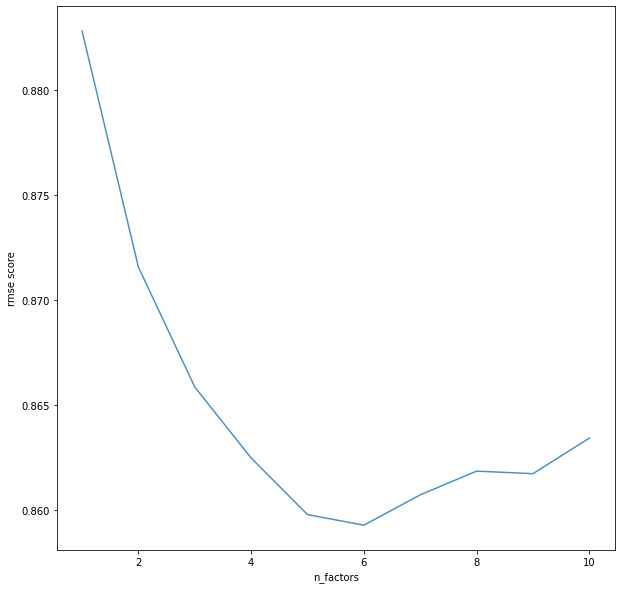

In [50]:
plt.plot(range(1,11), rmses, alpha = 0.8)
plt.xlabel('n_factors')
plt.ylabel('rmse score')
plt.show()

In [53]:
target_user_id = 4
model = SVD(n_factors = 8, lr_all = 0.005, reg_all = 0.02, n_epochs = 100)
model.fit(train_data)
test_data = []
for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    if movie_id in target_user_movie_rating_dict:
        rating = target_user_movie_rating_dict[movie_id]
        test_data.append((target_user_id, movie_id, rating))
        
taget_user_predictions = model.test(test_data)

def get_user_predicted_ratings(predictions, user_id, user_history):
    target_user_movie_predict_dict = {}
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id == uid:
            if mid in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict


target_user_movie_predict_dict = get_user_predicted_ratings(predictions = target_user_predictions, user_id = target_user_id, user_history = target_user_movie_rating_dict)
target_user_movie_predict_dict

{}